In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df_car = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/car%20data.csv")
df_car.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [13]:
df_car.shape

(301, 9)

In [14]:
df_car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [15]:
df_car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
df_car.corr()

Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000

<AxesSubplot:>

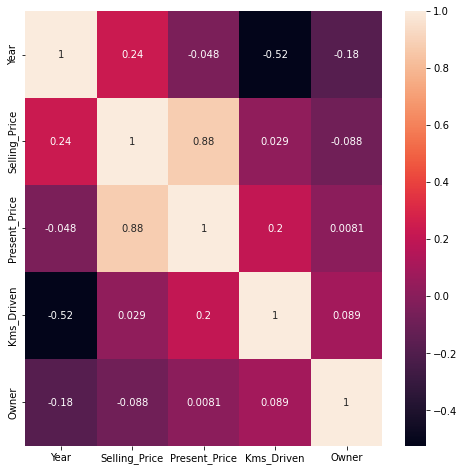

In [17]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df_car.corr(),annot=True)

In [18]:
df_car.drop(columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'],inplace=True)

In [20]:
df_car.head()

Year  Selling_Price  Present_Price  Kms_Driven  Owner
0  2014           3.35           5.59       27000      0
1  2013           4.75           9.54       43000      0
2  2017           7.25           9.85        6900      0
3  2011           2.85           4.15        5200      0
4  2014           4.60           6.87       42450      0

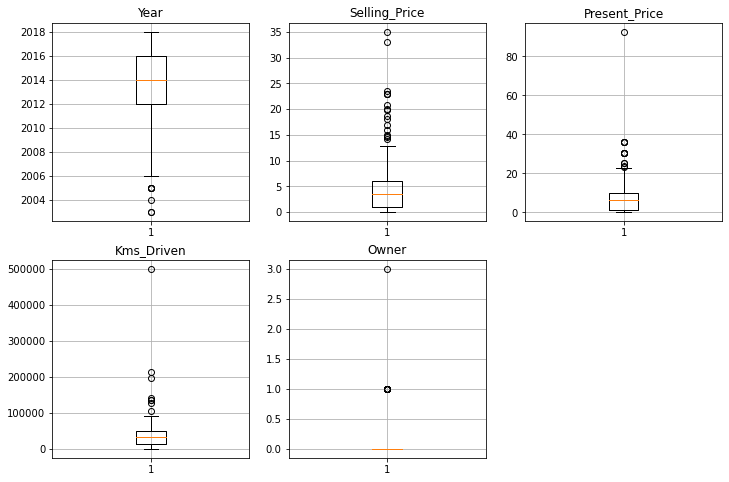

In [27]:
col_dict = {'Year':1, 'Selling_Price':2, 'Present_Price':3, 'Kms_Driven':4,'Owner':5}
fig = plt.figure(figsize=(12,8))
for variable,i in col_dict.items():
            plt.subplot(2,3,i)
            plt.boxplot(df_car[variable])
            plt.title(variable)
            plt.grid(True)

In [33]:
#Features with Outliers 
numcol=['Year','Selling_Price','Present_Price','Kms_Driven','Owner']
for column in numcol:
    if df_car[column].quantile(.9973)<df_car[column].max():
        print(column)
        print('99th Percentile',df_car[column].quantile(.9973))
        print('Max',df_car[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    elif df_car[column].quantile(0)>df_car[column].min():
        print(column)
        print('99th Percentile',df_car[column].quantile(.9973))
        print('Min',df_car[column].min())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        pass

Year
99th Percentile 2017.19
Max 2018
Outliers Present in Column Year

Selling_Price
99th Percentile 33.37999999999988
Max 35.0
Outliers Present in Column Selling_Price

Present_Price
99th Percentile 46.94029999999667
Max 92.6
Outliers Present in Column Present_Price

Kms_Driven
99th Percentile 267529.999999983
Max 500000
Outliers Present in Column Kms_Driven

Owner
99th Percentile 1.3799999999998818
Max 3
Outliers Present in Column Owner



## <font color='green'>As we can observe that we don't have the features whose correlation coefficients ar high so there will be no removal of the features</font>

# <font color='blue'>REGRESSION TASK</font>

## <font color='green'>Separate out the training and test datapoints</font>

In [35]:
X=df_car.drop("Selling_Price",axis=1)
y=df_car["Selling_Price"]

In [36]:
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [37]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_org, y_train)
print('Train Score: {:.4f}'.format(lreg.score(X_train_org, y_train)))
print('Test Score:{:.4f}'.format(lreg.score(X_test_org, y_test)))

Train Score: 0.8540
Test Score:0.8285


In [40]:
from sklearn import metrics

ylinear_predicted = lreg.predict(X_test_org)

print('MSE_LR:', metrics.mean_squared_error(y_test,ylinear_predicted))
print('R2_score_LR: {:.4f}'.format(metrics.r2_score(y_test,ylinear_predicted)))

MSE_LR: 5.129329157440011
R2_score_LR: 0.8285


## <font color='blue'>DecisionTree Regression</font>

In [41]:
from sklearn.tree import DecisionTreeRegressor
reg_DR=DecisionTreeRegressor(max_depth=6)
reg_DR.fit(X_train_org,y_train)

DecisionTreeRegressor(max_depth=6)

In [42]:
reg_DR.feature_importances_

array([0.0835681 , 0.90840433, 0.00802757, 0.        ])

In [43]:
pd.Series(reg_DR.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Present_Price    0.908404
Year             0.083568
Kms_Driven       0.008028
Owner            0.000000
dtype: float64

In [45]:
y_pred_DR = reg_DR.predict(X_test_org)

In [46]:
reg_DR.score(X_test_org,y_test)

0.91548537201232

In [47]:
from sklearn.metrics import mean_squared_error
mse_DR=mean_squared_error(y_test,y_pred_DR)
rmse_DR=np.sqrt(mse_DR)
rmse_DR

1.5898110759665178

## <font color='blue'>SVM Regression</font>

In [48]:
from sklearn.svm import SVR

In [49]:
SVRModel=SVR()

In [50]:
SVRModel.fit(X_train_org,y_train)

SVR()

In [51]:
y_pred_SVR=SVRModel.predict(X_test_org)

In [53]:
SVRModel.score(X_test_org,y_test)

-0.162392797058444

In [54]:
metrics.r2_score(y_test,y_pred_SVR)

-0.162392797058444

In [55]:
from sklearn.metrics import mean_squared_error
mse_svr=mean_squared_error(y_test,y_pred_DR)
rmse_svr=np.sqrt(mse_svr)
rmse_svr

1.5898110759665178

## <font color='blue'>So we can observe that decision tree is best among all model</font>